Saving train.zip to train.zip
✅ Extraction complete. Total files: 1000
✅ Dataset loaded: 1000 samples, Shape: (1000, 3072)

🎯 Accuracy: 0.56

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59       103
           1       0.55      0.51      0.53        97

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



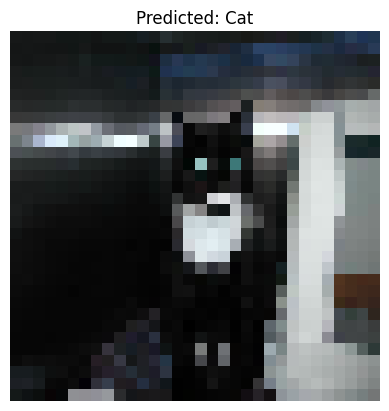

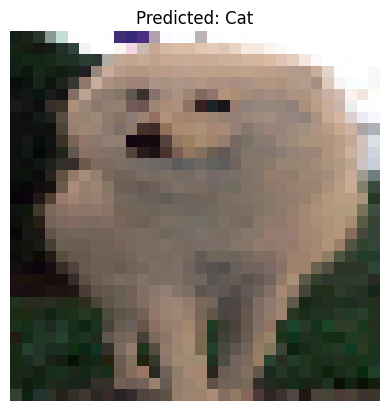

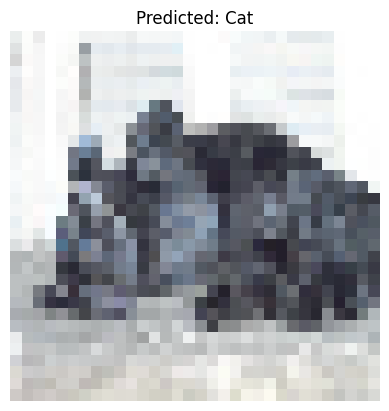

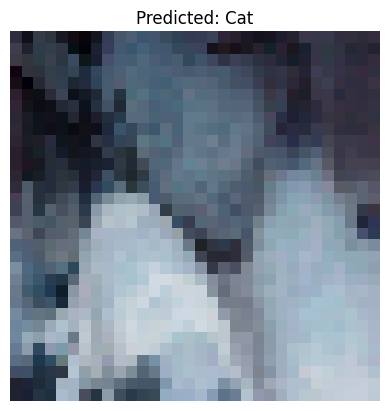

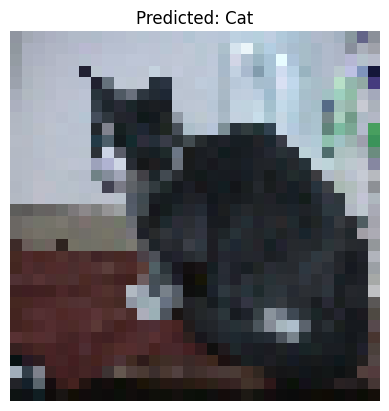

In [1]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

with zipfile.ZipFile("train.zip", 'r') as zip_ref:
    zip_ref.extractall("train")

print("✅ Extraction complete. Total files:", len(os.listdir("train/train")))

!pip install opencv-python-headless scikit-learn

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

# 🔧 Load + Resize + Flatten + Label
def load_images(folder, image_size=(32, 32), max_images=1000):
    X, y = [], []
    count = 0

    for file in os.listdir(folder):
        if file.endswith('.jpg'):
            label = 0 if 'cat' in file else 1
            path = os.path.join(folder, file)
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.resize(img, image_size)
            X.append(img.flatten())
            y.append(label)
            count += 1
            if count >= max_images:
                break

    return np.array(X), np.array(y)

X, y = load_images("train/train", image_size=(32, 32))
X, y = shuffle(X, y, random_state=42)

print(f"✅ Dataset loaded: {len(X)} samples, Shape: {X.shape}")

# 📊 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Train SVM
svm_model = SVC(kernel='rbf')  # try 'linear', 'poly' if needed
svm_model.fit(X_train, y_train)

# 📈 Evaluate
y_pred = svm_model.predict(X_test)

print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# 🖼️ Show Predictions
for i in range(5):
    img = X_test[i].reshape(32, 32, 3).astype(np.uint8)
    plt.imshow(img)
    plt.title("Predicted: " + ("Dog" if y_pred[i] == 1 else "Cat"))
    plt.axis('off')
    plt.show()
